<a href="https://colab.research.google.com/github/sezaionurlu/Hybrid-Recommender-System/blob/main/Hybrid_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**İş Problemi**

ID'si verilen kullanıcı için item-based ve user-based recommender yöntemleri kullanarak 10 film önerisi yapınız.

**Veri Seti Hikayesi**

Veri seti, bir film tavsiye hizmeti olan MovieLens tarafından sağlanmıştır. İçerisinde filmler ile birlikte bu filmlere yapılan
derecelendirme puanlarını barındırmaktadır. 27.278 filmde 2.000.0263 derecelendirme içermektedir. Bu veri seti ise 17 Ekim 2016
tarihinde oluşturulmuştur. 138.493 kullanıcı ve 09 Ocak 1995 ile 31 Mart 2015 tarihleri arasında verileri içermektedir. Kullanıcılar
rastgele seçilmiştir. Seçilen tüm kullanıcıların en az 20 filme oy verdiği bilgisi mevcuttur.

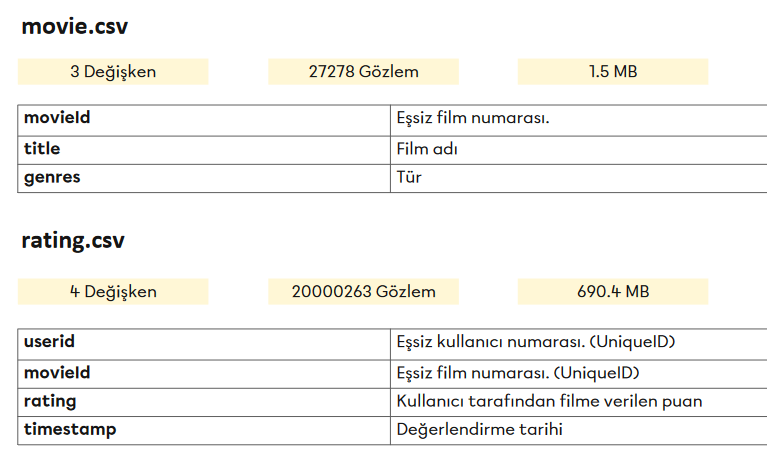

**PROJE GÖREVLERİ**

**User Based Recommendation**

**Görev 1:** Veri Hazırlama

**Adım 1: movie, rating** veri setlerini okutunuz.

In [ ]:
movie = pd.read_csv('/content/drive/MyDrive/Veri Bilimi/movie_lens_dataset/movie.csv')
rating = pd.read_csv('/content/drive/MyDrive/Veri Bilimi/movie_lens_dataset/rating.csv')

**Adım 2: rating** veri setine Id'lere ait film isimlerini ve türünü movie veri setinden ekleyiniz.

In [ ]:
df = rating.merge(movie, how="left", on="movieId")
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,2005-04-02 23:29:40,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


**Adım 3:** Toplam oy kullanılma sayısı 1000'in altında olan filmlerin isimlerini listede tutunuz ve veri setinden çıkartınız.

In [ ]:
comment_movies = df.groupby('movieId').agg({'rating':'count'})
comment_movies

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161
...,...
131254,1
131256,1
131258,1


In [ ]:
rare_movies = comment_movies[comment_movies['rating'] <= 10000].index
rare_movies

Int64Index([     4,      8,      9,     12,     13,     14,     15,     18,     20,     22,
            ...
            131241, 131243, 131248, 131250, 131252, 131254, 131256, 131258, 131260, 131262], dtype='int64', name='movieId', length=26282)

In [ ]:
common_df = df[~df['movieId'].isin(rare_movies)]

In [ ]:
common_df

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,2005-04-02 23:29:40,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
5,1,112,3.5,2004-09-10 03:09:00,Rumble in the Bronx (Hont faan kui) (1995),Action|Adventure|Comedy|Crime
...,...,...,...,...,...,...
20000229,138493,48516,5.0,2009-10-17 21:44:34,"Departed, The (2006)",Crime|Drama|Thriller
20000230,138493,48780,5.0,2009-10-17 18:39:59,"Prestige, The (2006)",Drama|Mystery|Sci-Fi|Thriller
20000235,138493,51662,4.5,2009-10-18 09:08:28,300 (2007),Action|Fantasy|War|IMAX
20000249,138493,59315,4.0,2009-10-17 22:22:18,Iron Man (2008),Action|Adventure|Sci-Fi


**Adım 4:** index'te userID'lerin sutunlarda film isimlerinin ve değer olarak ratinglerin bulunduğu dataframe için pivot table oluşturunuz.

In [ ]:
user_movie_df = common_df.pivot_table(index='userId', columns='title', values='rating')
user_movie_df

title,10 Things I Hate About You (1999),12 Angry Men (1957),2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),A.I. Artificial Intelligence (2001),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Addams Family Values (1993),"Adventures of Priscilla, Queen of the Desert, The (1994)","African Queen, The (1951)",Air Force One (1997),Airplane! (1980),Aladdin (1992),Alien (1979),Alien: Resurrection (1997),Aliens (1986),Alien³ (a.k.a. Alien 3) (1992),Almost Famous (2000),Amadeus (1984),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),"American President, The (1995)",Animal House (1978),Annie Hall (1977),Antz (1998),Apocalypse Now (1979),Apollo 13 (1995),Arachnophobia (1990),Armageddon (1998),Army of Darkness (1993),As Good as It Gets (1997),Austin Powers: International Man of Mystery (1997),Austin Powers: The Spy Who Shagged Me (1999),Babe (1995),Back to the Future (1985),Back to the Future Part II (1989),Back to the Future Part III (1990),Bad Boys (1995),Basic Instinct (1992),Batman (1989),Batman Begins (2005),Batman Forever (1995),Batman Returns (1992),"Beautiful Mind, A (2001)",Beauty and the Beast (1991),Beetlejuice (1988),Being John Malkovich (1999),Best in Show (2000),Beverly Hills Cop (1984),Beverly Hills Cop III (1994),Big (1988),Big Fish (2003),"Big Lebowski, The (1998)","Birdcage, The (1996)","Birds, The (1963)",Black Hawk Down (2001),Blade (1998),Blade Runner (1982),"Blair Witch Project, The (1999)",Blazing Saddles (1974),"Blues Brothers, The (1980)",Boogie Nights (1997),"Boot, Das (Boat, The) (1981)","Bourne Identity, The (2002)","Bourne Supremacy, The (2004)","Bourne Ultimatum, The (2007)",Bowling for Columbine (2002),Braveheart (1995),Brazil (1985),"Breakfast Club, The (1985)","Bridge on the River Kwai, The (1957)",Bridget Jones's Diary (2001),Broken Arrow (1996),"Bug's Life, A (1998)",Butch Cassidy and the Sundance Kid (1969),"Cable Guy, The (1996)",Casablanca (1942),Casino (1995),Casino Royale (2006),Casper (1995),Cast Away (2000),Catch Me If You Can (2002),Charlie's Angels (2000),Chasing Amy (1997),Chicken Run (2000),Chinatown (1974),Chocolat (2000),"Christmas Story, A (1983)",Citizen Kane (1941),City Slickers II: The Legend of Curly's Gold (1994),City of God (Cidade de Deus) (2002),Clear and Present Danger (1994),Clerks (1994),"Client, The (1994)",Cliffhanger (1993),"Clockwork Orange, A (1971)",Close Encounters of the Third Kind (1977),Clueless (1995),Cocoon (1985),Con Air (1997),Coneheads (1993),Congo (1995),Conspiracy Theory (1997),Contact (1997),Cool Hand Luke (1967),Crimson Tide (1995),Crocodile Dundee (1986),"Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)","Crow, The (1994)","Crying Game, The (1992)",Dances with Wolves (1990),Dark City (1998),"Dark Knight, The (2008)",Dave (1993),Dead Man Walking (1995),Dead Poets Society (1989),Deep Impact (1998),"Deer Hunter, The (1978)",Demolition Man (1993),"Departed, The (2006)",Desperado (1995),"Devil's Advocate, The (1997)",Die Hard (1988),Die Hard 2 (1990),Die Hard: With a Vengeance (1995),Dirty Dancing (1987),Disclosure (1994),Dogma (1999),Donnie Brasco (1997),Donnie Darko (2001),Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),Dracula (Bram Stoker's Dracula) (1992),Dragonheart (1996),Dumb & Dumber (Dumb and Dumber) (1994),E.T. the Extra-Terrestrial (1982),Ed Wood (1994),Edward Scissorhands (1990),Election (1999),Enemy of the State (1998),"English Patient, The (1996)",Eraser (1996),Erin Brockovich (2000),Eternal Sunshine of the Spotless Mind (2004),Executive Decision (1996),"Exorcist, The (1973)",Eyes Wide Shut (1999),Face/Off (1997),Fantasia (1940),Fargo (1996),Father of the Bride Part II (1995),Ferris Bueller's Day Off (1986),"Few Good Men, A (1992)",Field of Dreams (1989),"Fifth Element, The (1997)",Fight Club (1999),Finding Nemo (2003),"Firm, The (1993)",First Knight (1995),"Fish Called Wanda, A (1988)"

**Adım 5:** Yapılan tüm işlemleri fonksiyonlaştırınız.

In [ ]:
def create_user_movie_df():
    import pandas as pd
    movie = pd.read_csv('/content/drive/MyDrive/Veri Bilimi/movie_lens_dataset/movie.csv')
    rating = pd.read_csv('/content/drive/MyDrive/Veri Bilimi/movie_lens_dataset/rating.csv')
    df = movie.merge(rating, how="left", on="movieId")
    comment_counts = pd.DataFrame(df["title"].value_counts())
    rare_movies = comment_counts[comment_counts["title"] <= 10000].index
    common_movies = df[~df["title"].isin(rare_movies)]
    user_movie_df = common_movies.pivot_table(index=["userId"], columns=["title"], values="rating")
    return user_movie_df

**Görev 2:** Öneri Yapılacak Kullanıcının İzlediği Filmlerin Belirlenmesi

**Adım 1:** Rastgele bir kullanıcı id’si seçiniz.

In [ ]:
pd.Series(user_movie_df.index).sample(1).values[0]

98783

**Adım 2:** Seçilen kullanıcıya ait gözlem birimlerinden oluşan random_user_df adında yeni bir dataframe oluşturunuz.

In [ ]:
random_user_df = pd.DataFrame(user_movie_df.loc[98783,:])
random_user_df

,98783
title,
10 Things I Hate About You (1999),NaN
12 Angry Men (1957),NaN
2001: A Space Odyssey (1968),NaN
28 Days Later (2002),NaN
300 (2007),NaN
...,...
"X-Files: Fight the Future, The (1998)",NaN
X-Men (2000),NaN
X2: X-Men United (2003),NaN


In [ ]:
random_user_df = random_user_df.T

In [ ]:
random_user_df

title,10 Things I Hate About You (1999),12 Angry Men (1957),2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),A.I. Artificial Intelligence (2001),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Addams Family Values (1993),"Adventures of Priscilla, Queen of the Desert, The (1994)","African Queen, The (1951)",Air Force One (1997),Airplane! (1980),Aladdin (1992),Alien (1979),Alien: Resurrection (1997),Aliens (1986),Alien³ (a.k.a. Alien 3) (1992),Almost Famous (2000),Amadeus (1984),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),"American President, The (1995)",Animal House (1978),Annie Hall (1977),Antz (1998),Apocalypse Now (1979),Apollo 13 (1995),Arachnophobia (1990),Armageddon (1998),Army of Darkness (1993),As Good as It Gets (1997),Austin Powers: International Man of Mystery (1997),Austin Powers: The Spy Who Shagged Me (1999),Babe (1995),Back to the Future (1985),Back to the Future Part II (1989),Back to the Future Part III (1990),Bad Boys (1995),Basic Instinct (1992),Batman (1989),Batman Begins (2005),Batman Forever (1995),Batman Returns (1992),"Beautiful Mind, A (2001)",Beauty and the Beast (1991),Beetlejuice (1988),Being John Malkovich (1999),Best in Show (2000),Beverly Hills Cop (1984),Beverly Hills Cop III (1994),Big (1988),Big Fish (2003),"Big Lebowski, The (1998)","Birdcage, The (1996)","Birds, The (1963)",Black Hawk Down (2001),Blade (1998),Blade Runner (1982),"Blair Witch Project, The (1999)",Blazing Saddles (1974),"Blues Brothers, The (1980)",Boogie Nights (1997),"Boot, Das (Boat, The) (1981)","Bourne Identity, The (2002)","Bourne Supremacy, The (2004)","Bourne Ultimatum, The (2007)",Bowling for Columbine (2002),Braveheart (1995),Brazil (1985),"Breakfast Club, The (1985)","Bridge on the River Kwai, The (1957)",Bridget Jones's Diary (2001),Broken Arrow (1996),"Bug's Life, A (1998)",Butch Cassidy and the Sundance Kid (1969),"Cable Guy, The (1996)",Casablanca (1942),Casino (1995),Casino Royale (2006),Casper (1995),Cast Away (2000),Catch Me If You Can (2002),Charlie's Angels (2000),Chasing Amy (1997),Chicken Run (2000),Chinatown (1974),Chocolat (2000),"Christmas Story, A (1983)",Citizen Kane (1941),City Slickers II: The Legend of Curly's Gold (1994),City of God (Cidade de Deus) (2002),Clear and Present Danger (1994),Clerks (1994),"Client, The (1994)",Cliffhanger (1993),"Clockwork Orange, A (1971)",Close Encounters of the Third Kind (1977),Clueless (1995),Cocoon (1985),Con Air (1997),Coneheads (1993),Congo (1995),Conspiracy Theory (1997),Contact (1997),Cool Hand Luke (1967),Crimson Tide (1995),Crocodile Dundee (1986),"Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)","Crow, The (1994)","Crying Game, The (1992)",Dances with Wolves (1990),Dark City (1998),"Dark Knight, The (2008)",Dave (1993),Dead Man Walking (1995),Dead Poets Society (1989),Deep Impact (1998),"Deer Hunter, The (1978)",Demolition Man (1993),"Departed, The (2006)",Desperado (1995),"Devil's Advocate, The (1997)",Die Hard (1988),Die Hard 2 (1990),Die Hard: With a Vengeance (1995),Dirty Dancing (1987),Disclosure (1994),Dogma (1999),Donnie Brasco (1997),Donnie Darko (2001),Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),Dracula (Bram Stoker's Dracula) (1992),Dragonheart (1996),Dumb & Dumber (Dumb and Dumber) (1994),E.T. the Extra-Terrestrial (1982),Ed Wood (1994),Edward Scissorhands (1990),Election (1999),Enemy of the State (1998),"English Patient, The (1996)",Eraser (1996),Erin Brockovich (2000),Eternal Sunshine of the Spotless Mind (2004),Executive Decision (1996),"Exorcist, The (1973)",Eyes Wide Shut (1999),Face/Off (1997),Fantasia (1940),Fargo (1996),Father of the Bride Part II (1995),Ferris Bueller's Day Off (1986),"Few Good Men, A (1992)",Field of Dreams (1989),"Fifth Element, The (1997)",Fight Club (1999),Finding Nemo (2003),"Firm, The (1993)",First Knight (1995),"Fish Called Wanda, A (1988)"

In [ ]:
user_movie_df[user_movie_df.index == 98783]

title,10 Things I Hate About You (1999),12 Angry Men (1957),2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),A.I. Artificial Intelligence (2001),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Addams Family Values (1993),"Adventures of Priscilla, Queen of the Desert, The (1994)","African Queen, The (1951)",Air Force One (1997),Airplane! (1980),Aladdin (1992),Alien (1979),Alien: Resurrection (1997),Aliens (1986),Alien³ (a.k.a. Alien 3) (1992),Almost Famous (2000),Amadeus (1984),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),"American President, The (1995)",Animal House (1978),Annie Hall (1977),Antz (1998),Apocalypse Now (1979),Apollo 13 (1995),Arachnophobia (1990),Armageddon (1998),Army of Darkness (1993),As Good as It Gets (1997),Austin Powers: International Man of Mystery (1997),Austin Powers: The Spy Who Shagged Me (1999),Babe (1995),Back to the Future (1985),Back to the Future Part II (1989),Back to the Future Part III (1990),Bad Boys (1995),Basic Instinct (1992),Batman (1989),Batman Begins (2005),Batman Forever (1995),Batman Returns (1992),"Beautiful Mind, A (2001)",Beauty and the Beast (1991),Beetlejuice (1988),Being John Malkovich (1999),Best in Show (2000),Beverly Hills Cop (1984),Beverly Hills Cop III (1994),Big (1988),Big Fish (2003),"Big Lebowski, The (1998)","Birdcage, The (1996)","Birds, The (1963)",Black Hawk Down (2001),Blade (1998),Blade Runner (1982),"Blair Witch Project, The (1999)",Blazing Saddles (1974),"Blues Brothers, The (1980)",Boogie Nights (1997),"Boot, Das (Boat, The) (1981)","Bourne Identity, The (2002)","Bourne Supremacy, The (2004)","Bourne Ultimatum, The (2007)",Bowling for Columbine (2002),Braveheart (1995),Brazil (1985),"Breakfast Club, The (1985)","Bridge on the River Kwai, The (1957)",Bridget Jones's Diary (2001),Broken Arrow (1996),"Bug's Life, A (1998)",Butch Cassidy and the Sundance Kid (1969),"Cable Guy, The (1996)",Casablanca (1942),Casino (1995),Casino Royale (2006),Casper (1995),Cast Away (2000),Catch Me If You Can (2002),Charlie's Angels (2000),Chasing Amy (1997),Chicken Run (2000),Chinatown (1974),Chocolat (2000),"Christmas Story, A (1983)",Citizen Kane (1941),City Slickers II: The Legend of Curly's Gold (1994),City of God (Cidade de Deus) (2002),Clear and Present Danger (1994),Clerks (1994),"Client, The (1994)",Cliffhanger (1993),"Clockwork Orange, A (1971)",Close Encounters of the Third Kind (1977),Clueless (1995),Cocoon (1985),Con Air (1997),Coneheads (1993),Congo (1995),Conspiracy Theory (1997),Contact (1997),Cool Hand Luke (1967),Crimson Tide (1995),Crocodile Dundee (1986),"Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)","Crow, The (1994)","Crying Game, The (1992)",Dances with Wolves (1990),Dark City (1998),"Dark Knight, The (2008)",Dave (1993),Dead Man Walking (1995),Dead Poets Society (1989),Deep Impact (1998),"Deer Hunter, The (1978)",Demolition Man (1993),"Departed, The (2006)",Desperado (1995),"Devil's Advocate, The (1997)",Die Hard (1988),Die Hard 2 (1990),Die Hard: With a Vengeance (1995),Dirty Dancing (1987),Disclosure (1994),Dogma (1999),Donnie Brasco (1997),Donnie Darko (2001),Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),Dracula (Bram Stoker's Dracula) (1992),Dragonheart (1996),Dumb & Dumber (Dumb and Dumber) (1994),E.T. the Extra-Terrestrial (1982),Ed Wood (1994),Edward Scissorhands (1990),Election (1999),Enemy of the State (1998),"English Patient, The (1996)",Eraser (1996),Erin Brockovich (2000),Eternal Sunshine of the Spotless Mind (2004),Executive Decision (1996),"Exorcist, The (1973)",Eyes Wide Shut (1999),Face/Off (1997),Fantasia (1940),Fargo (1996),Father of the Bride Part II (1995),Ferris Bueller's Day Off (1986),"Few Good Men, A (1992)",Field of Dreams (1989),"Fifth Element, The (1997)",Fight Club (1999),Finding Nemo (2003),"Firm, The (1993)",First Knight (1995),"Fish Called Wanda, A (1988)"

**Adım 3:** Seçilen kullanıcıların oy kullandığı filmleri movies_watched adında bir listeye atayınız.

In [ ]:
random_user_df.notna().any()

title
10 Things I Hate About You (1999)        False
12 Angry Men (1957)                      False
2001: A Space Odyssey (1968)             False
28 Days Later (2002)                     False
300 (2007)                               False
                                         ...  
X-Files: Fight the Future, The (1998)    False
X-Men (2000)                             False
X2: X-Men United (2003)                  False
You've Got Mail (1998)                   False
Young Frankenstein (1974)                False
Length: 462, dtype: bool

In [ ]:
movies_watched = random_user_df.columns[random_user_df.notna().any()].tolist()
movies_watched

['Aliens (1986)',
 'Broken Arrow (1996)',
 'Cliffhanger (1993)',
 'Congo (1995)',
 'Die Hard: With a Vengeance (1995)',
 'Independence Day (a.k.a. ID4) (1996)',
 'Interview with the Vampire: The Vampire Chronicles (1994)',
 'Last of the Mohicans, The (1992)',
 'Leaving Las Vegas (1995)',
 'Mission: Impossible (1996)',
 'Natural Born Killers (1994)',
 'Silence of the Lambs, The (1991)',
 'Toy Story (1995)',
 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
 'Twister (1996)']

**Görev 3:** Aynı Filmleri İzleyen Diğer Kullanıcıların Verisine ve Id'lerine Erişilmesi

**Adım 1:** Seçilen kullanıcının izlediği fimlere ait sutunları user_movie_df'ten seçiniz ve movies_watched_df adında yeni bir dataframe oluşturunuz.

In [ ]:
movies_watched_df = user_movie_df.loc[:, user_movie_df.columns.isin(movies_watched)]
movies_watched_df

title,Aliens (1986),Broken Arrow (1996),Cliffhanger (1993),Congo (1995),Die Hard: With a Vengeance (1995),Independence Day (a.k.a. ID4) (1996),Interview with the Vampire: The Vampire Chronicles (1994),"Last of the Mohicans, The (1992)",Leaving Las Vegas (1995),Mission: Impossible (1996),Natural Born Killers (1994),"Silence of the Lambs, The (1991)",Toy Story (1995),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996)
userId,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.5,NaN,3.5,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,5.0,4.0,4.0,NaN
4,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
138490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,NaN
138491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN


In [ ]:
user_movie_df[movies_watched]

title,Aliens (1986),Broken Arrow (1996),Cliffhanger (1993),Congo (1995),Die Hard: With a Vengeance (1995),Independence Day (a.k.a. ID4) (1996),Interview with the Vampire: The Vampire Chronicles (1994),"Last of the Mohicans, The (1992)",Leaving Las Vegas (1995),Mission: Impossible (1996),Natural Born Killers (1994),"Silence of the Lambs, The (1991)",Toy Story (1995),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996)
userId,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.5,NaN,3.5,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,5.0,4.0,4.0,NaN
4,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
138490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,NaN
138491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN


In [ ]:
movies_watched_df.notnull().sum()

title
Aliens (1986)                                                27206
Broken Arrow (1996)                                          22104
Cliffhanger (1993)                                           24940
Congo (1995)                                                 14965
Die Hard: With a Vengeance (1995)                            33940
Independence Day (a.k.a. ID4) (1996)                         47048
Interview with the Vampire: The Vampire Chronicles (1994)    27568
Last of the Mohicans, The (1992)                             12419
Leaving Las Vegas (1995)                                     21553
Mission: Impossible (1996)                                   37127
Natural Born Killers (1994)                                  23610
Silence of the Lambs, The (1991)                             63299
Toy Story (1995)                                             49695
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)                    44980
Twister (1996)                                          

**Adım 2:** Her bir kullancının seçili user'in izlediği filmlerin kaçını izlediğini bilgisini taşıyan user_movie_count adında yeni bir dataframe
oluşturunuz.

In [ ]:
user_movie_count = movies_watched_df.T.notnull().sum()
user_movie_count

userId
1         4
2         0
3         6
4         2
5         4
         ..
138489    1
138490    2
138491    1
138492    0
138493    6
Length: 137658, dtype: int64

**Adım 3:** Seçilen kullanıcının oy verdiği filmlerin yüzde 60 ve üstünü izleyenlerin kullanıcı id’lerinden users_same_movies adında bir liste
oluşturunuz.

In [ ]:
len(movies_watched)

15

In [ ]:
user_movie_count = user_movie_count.reset_index()
user_movie_count

,userId,0
0,1,4
1,2,0
2,3,6
3,4,2
4,5,4
...,...,...
137653,138489,1
137654,138490,2
137655,138491,1
137656,138492,0


In [ ]:
user_movie_count.columns = ["userId", "movie_count"]
user_movie_count

,userId,movie_count
0,1,4
1,2,0
2,3,6
3,4,2
4,5,4
...,...,...
137653,138489,1
137654,138490,2
137655,138491,1
137656,138492,0


In [ ]:
user_movie_count[user_movie_count["movie_count"] > 9].sort_values("movie_count", ascending=False)

,userId,movie_count
20937,21055,15
130047,130831,15
49221,49529,15
15732,15822,15
4958,4989,15
...,...,...
69611,70037,10
69544,69969,10
69487,69912,10
69395,69820,10


In [ ]:
users_same_movies = user_movie_count[user_movie_count["movie_count"] > 9].sort_values("movie_count", ascending=False)['userId'].tolist()
users_same_movies

[21055,
 130831,
 49529,
 15822,
 4989,
 113181,
 64741,
 49201,
 15753,
 91948,
 15733,
 92104,
 122556,
 113209,
 92269,
 48727,
 79357,
 23165,
 64843,
 23173,
 64901,
 23190,
 117395,
 65180,
 79159,
 92616,
 4598,
 4594,
 48136,
 108316,
 113336,
 108564,
 132846,
 108195,
 64175,
 51703,
 132715,
 62984,
 89536,
 112921,
 51558,
 109306,
 51227,
 63071,
 63218,
 50943,
 16075,
 90500,
 90525,
 22231,
 50367,
 113050,
 50194,
 113073,
 91067,
 22443,
 108850,
 136599,
 49758,
 91217,
 130876,
 91348,
 9544,
 122364,
 4529,
 65295,
 130477,
 113632,
 65785,
 107640,
 94652,
 10321,
 78093,
 107579,
 107572,
 45461,
 117144,
 3743,
 24565,
 15266,
 66143,
 77884,
 124052,
 44882,
 24688,
 3618,
 44530,
 24709,
 24718,
 24719,
 44492,
 77696,
 124133,
 24830,
 24846,
 66533,
 77584,
 94541,
 94259,
 92956,
 24219,
 92960,
 65297,
 93018,
 134911,
 93113,
 4358,
 47052,
 93219,
 130754,
 136897,
 93316,
 10012,
 10026,
 15529,
 65503,
 46744,
 23843,
 46689,
 93555,
 78453,
 78356,
 4

**Görev 4:** Öneri Yapılacak Kullanıcı ile En Benzer Kullanıcıların Belirlenmesi

**Adım 1: user_same_movies** listesi içerisindeki seçili user ile benzerlik gösteren kullanıcıların id’lerinin bulunacağı şekilde movies_watched_df
dataframe’ini filtreleyiniz.

In [ ]:
final_df = movies_watched_df.loc[users_same_movies,:]
final_df

title,Aliens (1986),Broken Arrow (1996),Cliffhanger (1993),Congo (1995),Die Hard: With a Vengeance (1995),Independence Day (a.k.a. ID4) (1996),Interview with the Vampire: The Vampire Chronicles (1994),"Last of the Mohicans, The (1992)",Leaving Las Vegas (1995),Mission: Impossible (1996),Natural Born Killers (1994),"Silence of the Lambs, The (1991)",Toy Story (1995),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996)
userId,,,,,,,,,,,,,,,
21055,4.0,2.0,1.0,1.0,2.0,2.0,4.0,3.0,5.0,1.0,5.0,3.0,3.0,5.0,2.0
130831,5.0,4.0,4.0,3.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
49529,4.5,3.0,1.5,1.0,4.0,3.0,4.0,3.5,3.0,4.0,4.5,4.0,3.0,4.5,1.5
15822,4.0,1.0,3.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,5.0,4.0
4989,5.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,4.0,4.0,5.0,5.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70037,NaN,NaN,3.0,NaN,3.0,3.5,2.0,5.0,NaN,4.0,NaN,5.0,3.5,3.5,3.5
69969,5.0,NaN,NaN,NaN,4.0,4.0,3.0,3.0,5.0,3.0,NaN,5.0,5.0,4.0,NaN
69912,NaN,3.0,3.0,3.0,3.0,4.0,3.0,NaN,4.0,NaN,3.0,5.0,NaN,3.0,NaN


In [ ]:
movies_watched_df[movies_watched_df.index.isin(users_same_movies)]

title,Aliens (1986),Broken Arrow (1996),Cliffhanger (1993),Congo (1995),Die Hard: With a Vengeance (1995),Independence Day (a.k.a. ID4) (1996),Interview with the Vampire: The Vampire Chronicles (1994),"Last of the Mohicans, The (1992)",Leaving Las Vegas (1995),Mission: Impossible (1996),Natural Born Killers (1994),"Silence of the Lambs, The (1991)",Toy Story (1995),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996)
userId,,,,,,,,,,,,,,,
11,5.0,NaN,NaN,4.0,4.0,5.0,4.5,NaN,NaN,4.0,NaN,5.0,4.5,5.0,5.0
24,5.0,4.0,NaN,NaN,4.0,4.0,5.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,NaN
54,5.0,2.0,NaN,3.0,5.0,5.0,NaN,4.0,2.0,3.0,1.0,5.0,4.0,5.0,4.0
58,4.0,NaN,3.0,NaN,5.0,2.0,5.0,4.0,NaN,NaN,5.0,5.0,5.0,5.0,4.0
69,4.0,3.0,NaN,3.0,4.0,4.0,4.0,NaN,3.0,4.0,3.0,4.0,4.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138397,5.0,NaN,NaN,3.5,4.0,5.0,4.5,5.0,NaN,4.0,2.0,3.5,NaN,4.5,NaN
138404,4.5,4.0,3.5,NaN,4.0,4.0,3.5,NaN,NaN,NaN,NaN,3.0,5.0,4.0,3.0
138411,5.0,3.0,2.0,NaN,2.0,2.5,NaN,3.5,3.0,2.5,4.0,4.0,5.0,5.0,2.0


**Adım 2:** Kullanıcıların birbirleri ile olan korelasyonlarının bulunacağı yeni bir **corr_df** dataframe’i oluşturunuz.

In [ ]:
corr_df = final_df.T.corr().unstack().sort_values().drop_duplicates()
corr_df

userId  userId
72411   62973    -1.0
137821  112800   -1.0
57053   31777    -1.0
14412   110714   -1.0
92325   2424     -1.0
                 ... 
69912   38255     1.0
116271  38829     1.0
53735   50407     1.0
13947   126927    1.0
21055   77588     NaN
Length: 9076608, dtype: float64

**Adım 3:** Seçili kullanıcı ile yüksek korelasyona sahip (0.65’in üzerinde olan) kullanıcıları filtreleyerek **top_users** adında yeni bir dataframe
oluşturunuz.

In [ ]:
corr_df = pd.DataFrame(corr_df, columns=["corr"])
corr_df

,,corr
userId,userId,
72411,62973,-1.0
137821,112800,-1.0
57053,31777,-1.0
14412,110714,-1.0
92325,2424,-1.0
...,...,...
69912,38255,1.0
116271,38829,1.0
53735,50407,1.0


In [ ]:
corr_df.index.names = ['user_id_1', 'user_id_2']
corr_df = corr_df.reset_index()
corr_df

,user_id_1,user_id_2,corr
0,72411,62973,-1.0
1,137821,112800,-1.0
2,57053,31777,-1.0
3,14412,110714,-1.0
4,92325,2424,-1.0
...,...,...,...
9076603,69912,38255,1.0
9076604,116271,38829,1.0
9076605,53735,50407,1.0
9076606,13947,126927,1.0


In [ ]:
top_users = corr_df[(corr_df["user_id_1"] == 98783) & (corr_df["corr"] >= 0.65)][
    ["user_id_2", "corr"]].reset_index(drop=True)

top_users

,user_id_2,corr
0,74586,0.650532
1,130602,0.651340
2,28764,0.651540
3,128077,0.652266
4,29507,0.653117
...,...,...
64,128008,0.862787
65,71315,0.863227
66,88027,0.867810
67,2947,0.881831


**Adım 4: top_users** dataframe’ine **rating** veri seti ile merge ediniz.

In [ ]:
rating

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


In [ ]:
top_users = top_users.sort_values(by='corr', ascending=False)
top_users.rename(columns={"user_id_2": "userId"}, inplace=True)
top_users

,userId,corr
68,137109,0.884944
67,2947,0.881831
66,88027,0.867810
65,71315,0.863227
64,128008,0.862787
...,...,...
4,29507,0.653117
3,128077,0.652266
2,28764,0.651540
1,130602,0.651340


In [ ]:
top_users_ratings = top_users.merge(rating[["userId", "movieId", "rating"]], how='inner')
top_users_ratings = top_users_ratings[top_users_ratings["userId"] != 98783]
top_users_ratings

,userId,corr,movieId,rating
0,137109,0.884944,1,3.5
1,137109,0.884944,2,3.5
2,137109,0.884944,3,3.5
3,137109,0.884944,5,2.0
4,137109,0.884944,6,1.5
...,...,...,...,...
56093,74586,0.650532,70286,4.0
56094,74586,0.650532,72226,3.0
56095,74586,0.650532,79132,4.0
56096,74586,0.650532,86892,3.5


**Görev 5:** Weighted Average Recommendation Score'un Hesaplanması ve İlk 5 Filmin Tutulması

**Adım 1:** Her bir kullanıcının **corr** ve **rating** değerlerinin çarpımından oluşan **weighted_rating** adında yeni bir değişken oluşturunuz.

In [ ]:
top_users_ratings['weighted_rating'] = top_users_ratings['corr'] * top_users_ratings['rating']
top_users_ratings

,userId,corr,movieId,rating,weighted_rating
0,137109,0.884944,1,3.5,3.097305
1,137109,0.884944,2,3.5,3.097305
2,137109,0.884944,3,3.5,3.097305
3,137109,0.884944,5,2.0,1.769889
4,137109,0.884944,6,1.5,1.327417
...,...,...,...,...,...
56093,74586,0.650532,70286,4.0,2.602130
56094,74586,0.650532,72226,3.0,1.951597
56095,74586,0.650532,79132,4.0,2.602130
56096,74586,0.650532,86892,3.5,2.276864


**Adım 2:** Film id’si ve her bir filme ait tüm kullanıcıların weighted rating’lerinin ortalama değerini içeren **recommendation_df** adında yeni bir
dataframe oluşturunuz.

In [ ]:
recommendation_df = top_users_ratings.groupby('movieId').agg({'weighted_rating':'mean'})
recommendation_df

,weighted_rating
movieId,
1,3.033939
2,2.177479
3,2.291221
4,2.732902
5,2.178546
...,...
125523,2.752894
129843,2.752894
130073,2.098342


**Adım 3: recommendation_df** içerisinde weighted rating'i 3.5'ten büyük olan filmleri seçiniz ve weighted rating’e göre sıralayınız.

In [ ]:
recommendation_df = recommendation_df[recommendation_df['weighted_rating'] > 3.5].sort_values('weighted_rating', ascending=False)
recommendation_df

,weighted_rating
movieId,
7916,4.223003
5099,4.223003
917,4.223003
4523,4.223003
4601,4.223003
...,...
4769,3.503536
69849,3.503536
3609,3.503536


**Adım 4:** movie veri setinden film isimlerini getiriniz ve tavsiye edilecek ilk 5 filmi seçiniz.

In [ ]:
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [ ]:
recommendation_df.merge(movie, how='left' , on='movieId').head()['title'].tolist()

['Gidget (1959)',
 'Heidi (1937)',
 'Little Princess, The (1939)',
 'Milagro Beanfield War (1988)',
 'Happy Together (1989)']

**Item Based Recommendation**

**Görev 1:** Kullanıcının izlediği en son ve en yüksek puan verdiği filme göre item-based öneri yapınız.

**Adım 1: movie, rating** veri setlerini okutunuz.

In [ ]:
movie = pd.read_csv('/content/drive/MyDrive/Veri Bilimi/movie_lens_dataset/movie.csv')
rating = pd.read_csv('/content/drive/MyDrive/Veri Bilimi/movie_lens_dataset/rating.csv')

**Adım 2:** Seçili kullanıcının 5 puan verdiği filmlerden puanı en güncel olan filmin id'sinin alınız.

In [ ]:
98783

In [ ]:
common_df[(common_df['userId'] == 98783) & (common_df['rating'] == 5.0)].sort_values('timestamp', ascending=False)[['movieId']].iloc[0,0]

165

**Adım 3:** User based recommendation bölümünde oluşturulan **user_movie_df** dataframe’ini seçilen film id’sine göre filtreleyiniz.

In [ ]:
user_movie_df

title,10 Things I Hate About You (1999),12 Angry Men (1957),2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),A.I. Artificial Intelligence (2001),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Addams Family Values (1993),"Adventures of Priscilla, Queen of the Desert, The (1994)","African Queen, The (1951)",Air Force One (1997),Airplane! (1980),Aladdin (1992),Alien (1979),Alien: Resurrection (1997),Aliens (1986),Alien³ (a.k.a. Alien 3) (1992),Almost Famous (2000),Amadeus (1984),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),"American President, The (1995)",Animal House (1978),Annie Hall (1977),Antz (1998),Apocalypse Now (1979),Apollo 13 (1995),Arachnophobia (1990),Armageddon (1998),Army of Darkness (1993),As Good as It Gets (1997),Austin Powers: International Man of Mystery (1997),Austin Powers: The Spy Who Shagged Me (1999),Babe (1995),Back to the Future (1985),Back to the Future Part II (1989),Back to the Future Part III (1990),Bad Boys (1995),Basic Instinct (1992),Batman (1989),Batman Begins (2005),Batman Forever (1995),Batman Returns (1992),"Beautiful Mind, A (2001)",Beauty and the Beast (1991),Beetlejuice (1988),Being John Malkovich (1999),Best in Show (2000),Beverly Hills Cop (1984),Beverly Hills Cop III (1994),Big (1988),Big Fish (2003),"Big Lebowski, The (1998)","Birdcage, The (1996)","Birds, The (1963)",Black Hawk Down (2001),Blade (1998),Blade Runner (1982),"Blair Witch Project, The (1999)",Blazing Saddles (1974),"Blues Brothers, The (1980)",Boogie Nights (1997),"Boot, Das (Boat, The) (1981)","Bourne Identity, The (2002)","Bourne Supremacy, The (2004)","Bourne Ultimatum, The (2007)",Bowling for Columbine (2002),Braveheart (1995),Brazil (1985),"Breakfast Club, The (1985)","Bridge on the River Kwai, The (1957)",Bridget Jones's Diary (2001),Broken Arrow (1996),"Bug's Life, A (1998)",Butch Cassidy and the Sundance Kid (1969),"Cable Guy, The (1996)",Casablanca (1942),Casino (1995),Casino Royale (2006),Casper (1995),Cast Away (2000),Catch Me If You Can (2002),Charlie's Angels (2000),Chasing Amy (1997),Chicken Run (2000),Chinatown (1974),Chocolat (2000),"Christmas Story, A (1983)",Citizen Kane (1941),City Slickers II: The Legend of Curly's Gold (1994),City of God (Cidade de Deus) (2002),Clear and Present Danger (1994),Clerks (1994),"Client, The (1994)",Cliffhanger (1993),"Clockwork Orange, A (1971)",Close Encounters of the Third Kind (1977),Clueless (1995),Cocoon (1985),Con Air (1997),Coneheads (1993),Congo (1995),Conspiracy Theory (1997),Contact (1997),Cool Hand Luke (1967),Crimson Tide (1995),Crocodile Dundee (1986),"Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)","Crow, The (1994)","Crying Game, The (1992)",Dances with Wolves (1990),Dark City (1998),"Dark Knight, The (2008)",Dave (1993),Dead Man Walking (1995),Dead Poets Society (1989),Deep Impact (1998),"Deer Hunter, The (1978)",Demolition Man (1993),"Departed, The (2006)",Desperado (1995),"Devil's Advocate, The (1997)",Die Hard (1988),Die Hard 2 (1990),Die Hard: With a Vengeance (1995),Dirty Dancing (1987),Disclosure (1994),Dogma (1999),Donnie Brasco (1997),Donnie Darko (2001),Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),Dracula (Bram Stoker's Dracula) (1992),Dragonheart (1996),Dumb & Dumber (Dumb and Dumber) (1994),E.T. the Extra-Terrestrial (1982),Ed Wood (1994),Edward Scissorhands (1990),Election (1999),Enemy of the State (1998),"English Patient, The (1996)",Eraser (1996),Erin Brockovich (2000),Eternal Sunshine of the Spotless Mind (2004),Executive Decision (1996),"Exorcist, The (1973)",Eyes Wide Shut (1999),Face/Off (1997),Fantasia (1940),Fargo (1996),Father of the Bride Part II (1995),Ferris Bueller's Day Off (1986),"Few Good Men, A (1992)",Field of Dreams (1989),"Fifth Element, The (1997)",Fight Club (1999),Finding Nemo (2003),"Firm, The (1993)",First Knight (1995),"Fish Called Wanda, A (1988)"

In [ ]:
movie[movie['movieId'] == 165][['title']].iloc[0,0]

'Die Hard: With a Vengeance (1995)'

In [ ]:
filtered_df = user_movie_df['Die Hard: With a Vengeance (1995)']
filtered_df

userId
1         NaN
2         NaN
3         NaN
4         3.0
5         NaN
         ... 
138489    NaN
138490    NaN
138491    NaN
138492    NaN
138493    NaN
Name: Die Hard: With a Vengeance (1995), Length: 137658, dtype: float64

**Adım 4:** Filtrelenen dataframe’i kullanarak seçili filmle diğer filmlerin korelasyonunu bulunuz ve sıralayınız.

In [ ]:
user_movie_df.corrwith(filtered_df).sort_values(ascending=False).head(10)

title
Die Hard: With a Vengeance (1995)    1.000000
Die Hard 2 (1990)                    0.615365
Die Hard (1988)                      0.545714
Lethal Weapon 2 (1989)               0.515583
Con Air (1997)                       0.458074
Lethal Weapon (1987)                 0.435499
Bad Boys (1995)                      0.428732
Rock, The (1996)                     0.424583
Cliffhanger (1993)                   0.408911
Armageddon (1998)                    0.406808
dtype: float64

**Adım 5:** Seçili film’in kendisi haricinde ilk 5 film’I öneri olarak veriniz.

In [ ]:
pd.DataFrame(user_movie_df.corrwith(filtered_df).sort_values(ascending=False)).iloc[1:6,:].index

Index(['Die Hard 2 (1990)', 'Die Hard (1988)', 'Lethal Weapon 2 (1989)', 'Con Air (1997)', 'Lethal Weapon (1987)'], dtype='object', name='title')